# Stock Prices Prediction

**Context**

High-quality financial data is expensive to acquire and is therefore rarely shared for free. Here I provide the full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT. It's one of the best datasets of its kind you can obtain.

**Content**

The data (last updated 11/10/2017) is presented in CSV format as follows: Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits.

# 1.0 Data Preprocessing

## 1.1 Data Collection

### 1.1.1 Import Libraries

In [ ]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder

import os
import random
import datetime as dt

from google.colab import drive

warnings.filterwarnings('ignore')   # ignore warnings
pd.set_option('display.max_rows', None) # setting styles 
plt.style.use('seaborn-whitegrid')
% matplotlib inline

### 1.1.2 Import Data

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/Y4_T1/Machine Learning/Data/' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir(path+'Stocks')
list = os.listdir()
number_of_files = len(list)
stocks_filenames = [x for x in os.listdir() if x.endswith('.txt') and os.path.getsize(os.path.join('',x)) > 0]

In [ ]:
print("Number of stock companies:",number_of_files) # of companies in Stocks List
print('Number of stock files:',len(stocks_filenames))

Number of stock companies: 7199
Number of stock files: 7163


In [ ]:
data = []

for filename in stocks_filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [ ]:
len(data)

7163

In [ ]:
i=0
df=pd.DataFrame()
while i<len(data):
  df=df.append(data[i])
  i+=1
df=df.reset_index(drop=True)

In [ ]:
df.Label.value_counts().count()

7163

### 1.1.3 Save files to drive

In [ ]:
# store these files in a new csv
df.to_csv('data.csv')
!cp data.csv "/content/drive/My Drive/Y4_T1/Machine Learning/Data/"

In [ ]:
# also probably best to store files as pickles to save loading time
# serialize your DataFrame data
df.to_pickle('data.zip')
!cp data.zip "/content/drive/My Drive/Y4_T1/Machine Learning/Data/"

In [ ]:
# when needed, retrieve data into a new DataFrame.
data = pd.read_pickle(path+'data.zip')

### 1.1.4 Preview Data

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2016-04-14,25.7800,25.80,24.78,25.79,75230,0,stt_g
1,2016-04-15,25.7956,25.81,25.75,25.75,160744,0,stt_g
2,2016-04-18,25.8200,25.84,25.70,25.76,192724,0,stt_g
3,2016-04-19,25.8400,25.90,25.79,25.81,232248,0,stt_g
4,2016-04-20,25.8600,25.94,25.84,25.91,58459,0,stt_g


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
14887660,2017-11-01,26.7318,26.79,26.6700,26.77,1350,0,agm_b
14887661,2017-11-02,26.6700,26.67,26.5800,26.58,3411,0,agm_b
14887662,2017-11-03,26.6900,26.69,26.5950,26.68,1677,0,agm_b
14887663,2017-11-06,26.7000,26.70,26.7000,26.70,239,0,agm_b
14887664,2017-11-07,26.5401,26.75,26.5401,26.75,900,0,agm_b


## 1.2 Data Exploration

### 1.2.1 Get Info about the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14887665 entries, 0 to 14887664
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Date     datetime64[ns]
 1   Open     float64       
 2   High     float64       
 3   Low      float64       
 4   Close    float64       
 5   Volume   int64         
 6   OpenInt  int64         
 7   Label    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 908.7+ MB


### 1.2.2 Describe the Data

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1.488766e+07,1.488766e+07,1.488766e+07,1.488766e+07,1.488766e+07,14887665.0
mean,3.038538e+04,3.121247e+04,2.936176e+04,3.024522e+04,1.585730e+06,0.0
std,4.202501e+06,4.323486e+06,4.046981e+06,4.180590e+06,7.635187e+06,0.0
min,0.000000e+00,4.000000e-03,-1.000000e+00,3.700000e-03,0.000000e+00,0.0
25%,7.750000e+00,7.884000e+00,7.610000e+00,7.750000e+00,3.280000e+04,0.0
50%,1.568000e+01,1.591900e+01,1.543100e+01,1.568000e+01,1.922660e+05,0.0
75%,2.890000e+01,2.927900e+01,2.850000e+01,2.889990e+01,8.917860e+05,0.0
max,1.423713e+09,1.442049e+09,1.362118e+09,1.437986e+09,2.423735e+09,0.0


### 1.2.3 Check Shape

In [ ]:
print('There are {} rows and {} columns'.format(data.shape[0], data.shape[1]))

There are 14887665 rows and 8 columns


### 1.2.4 Check Missing Values

In [ ]:
data.isnull().values.any()

False

### 1.2.5 Check Duplicates

In [ ]:
data.duplicated().any()

False

## 1.3 Data Visualization

In [ ]:
selected_companies=data[data['Label'].isin(['jnj','jpm','gs','nke','pfe'])]

In [ ]:
selected_companies.shape

(45471, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8265199a10>,
      dtype=object)

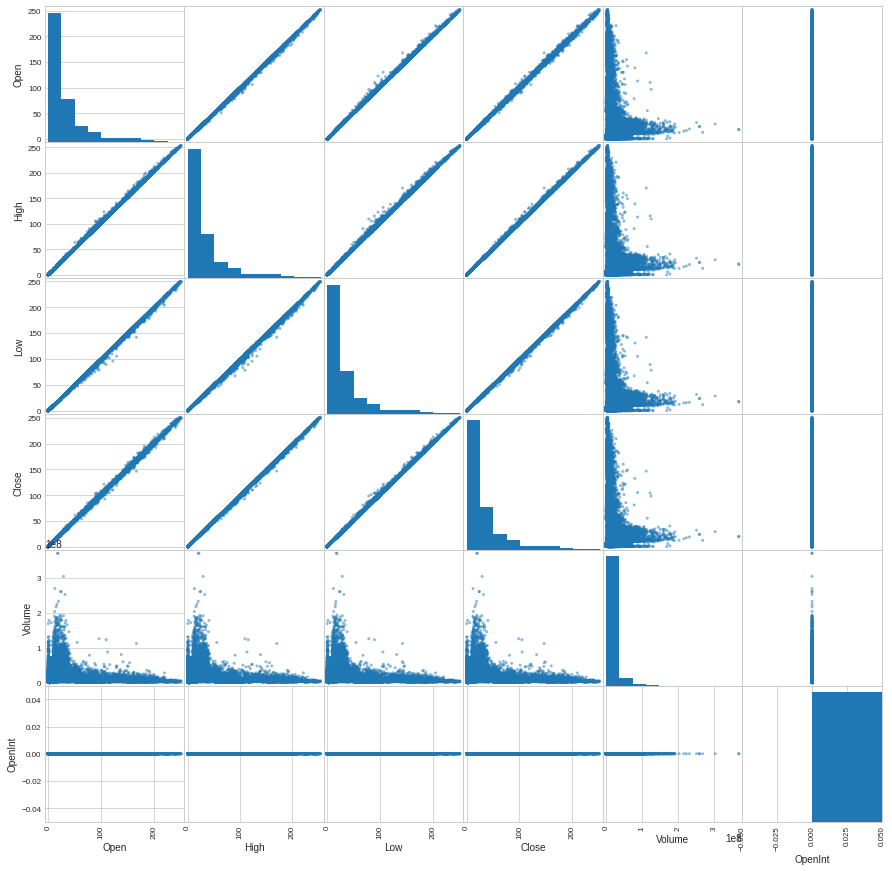

In [ ]:
pd.plotting.scatter_matrix(selected_companies,figsize=(15,15),grid=True)

### 1.3.1 Closing price

In [ ]:
c1=selected_companies[selected_companies['Label'] == 'jnj']
c2=selected_companies[selected_companies['Label'] == 'jpm']
c3=selected_companies[selected_companies['Label'] == 'gs']
c4=selected_companies[selected_companies['Label'] == 'nke']
c5=selected_companies[selected_companies['Label'] == 'pfe']

In [ ]:
c1 = c1.sort_values('Date')
c2 = c2.sort_values('Date')
c3 = c3.sort_values('Date')
c4 = c4.sort_values('Date')
c5 = c5.sort_values('Date')

Text(0.5, 1.0, 'Closing Prices Over the Years')

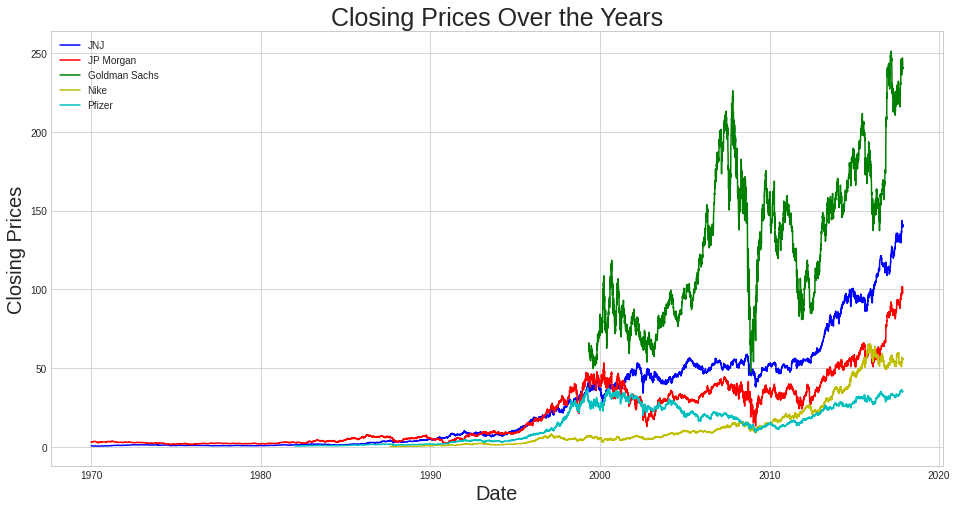

In [ ]:
# Plot closing prices
plt.figure(figsize=(16,8))
plt.grid(True)
line1, = plt.plot(c1['Date'], c1['Close'], label='JNJ',color='b')
line2, = plt.plot(c2['Date'], c2['Close'], label='JP Morgan',color='r')
line3, = plt.plot(c3['Date'], c3['Close'], label='Goldman Sachs',color='g')
line4, = plt.plot(c4['Date'], c4['Close'], label='Nike',color='y')
line5, = plt.plot(c5['Date'], c5['Close'], label='Pfizer',color='c')
plt.xlabel('Date',size=20)
plt.ylabel('Closing Prices',size=20)
plt.legend([line1, line2, line3, line4, line5], ['JNJ', 'JP Morgan', 'Goldman Sachs', 'Nike', 'Pfizer'])
plt.title('Closing Prices Over the Years',size=25)

### 1.3.2 Volume

* the total amount of trading activity

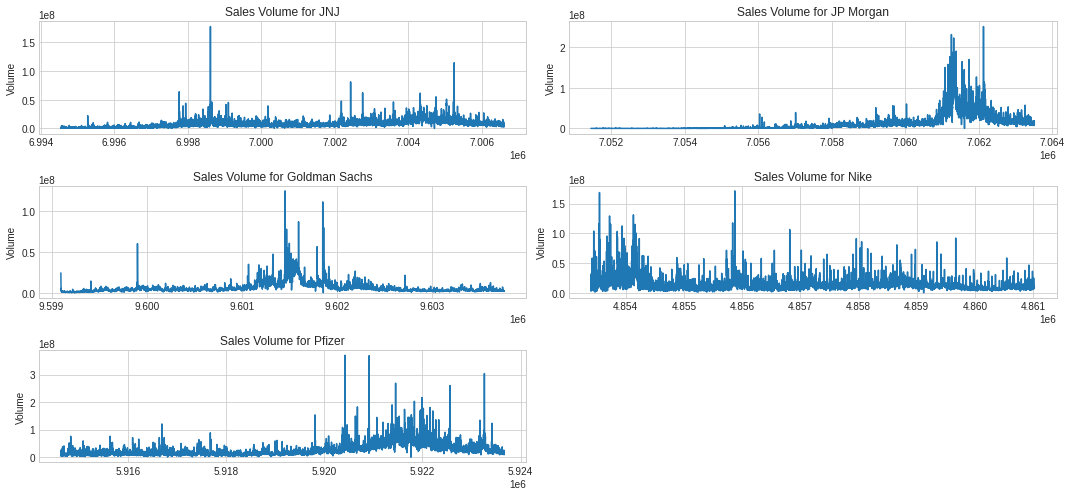

In [ ]:
# plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

tech_list = ['JNJ', 'JP Morgan', 'Goldman Sachs', 'Nike', 'Pfizer']
company_list = [c1,c2,c3,c4,c5]

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### 1.3.3 High vs Low

- the maximum and minimum prices 

Text(0.5, 1.0, 'JNJ High vs Low Over the Years')

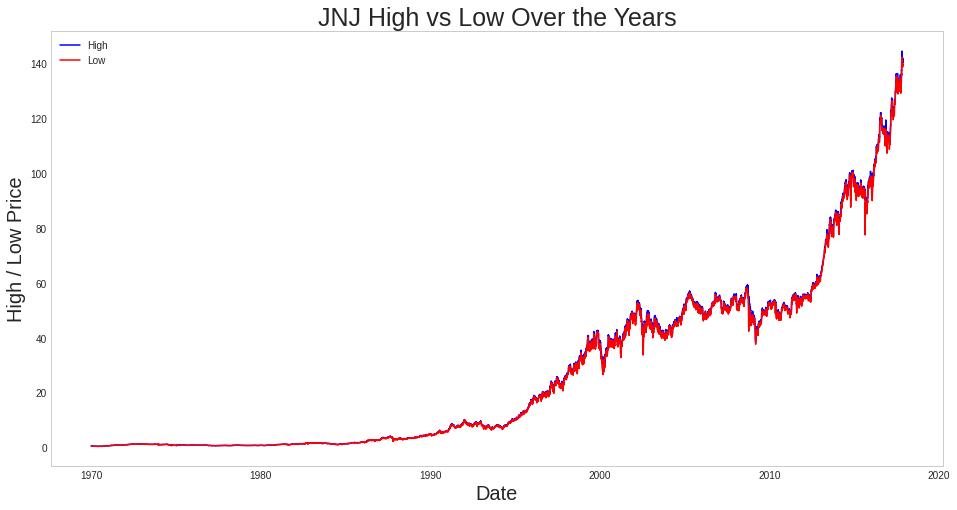

In [ ]:
# Plot high/low prices
plt.figure(figsize=(16,8))
plt.grid()
line1, = plt.plot(c1['Date'], c1['High'], label='High',color='b')
line2, = plt.plot(c1['Date'], c1['Low'], label='Low',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('High / Low Price',size=20)
plt.legend([line1, line2], ['High', 'Low'])
plt.title('JNJ High vs Low Over the Years',size=25)

### 1.3.4 Open vs Close

- the prices at which a stock began and ended trading in the same period

Text(0.5, 1.0, 'JP Morgan Open vs Close Over the Years')

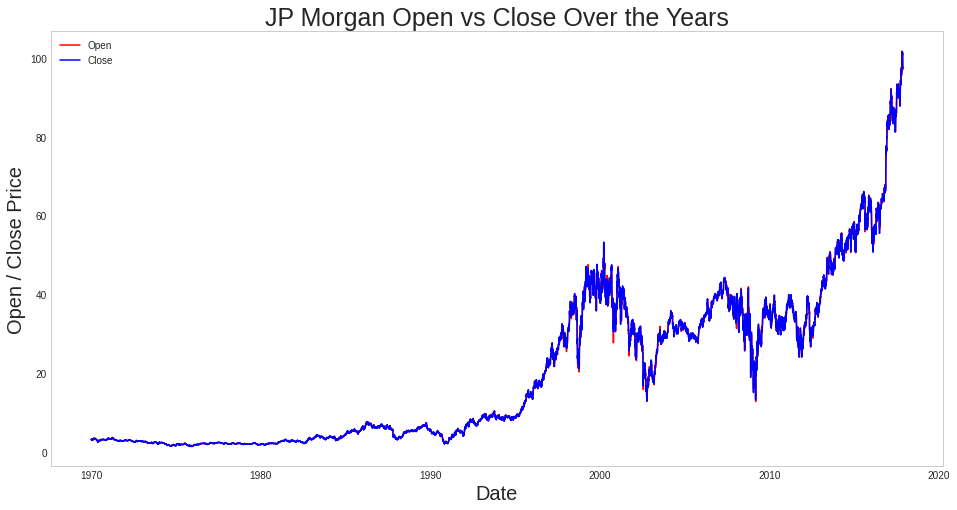

In [ ]:
# Plot open/close prices
plt.figure(figsize=(16,8))
plt.grid()
line1, = plt.plot(c2['Date'], c2['Open'], label='Open',color='r')
line2, = plt.plot(c2['Date'], c2['Close'], label='Close',color='b')
plt.xlabel('Date',size=20)
plt.ylabel('Open / Close Price',size=20)
plt.legend([line1, line2], ['Open', 'Close'])
plt.title('JP Morgan Open vs Close Over the Years',size=25)

### 1.3.5 Open vs Volume

Text(0.5, 1.0, 'JP Morgan Open vs Volume Over the Years')

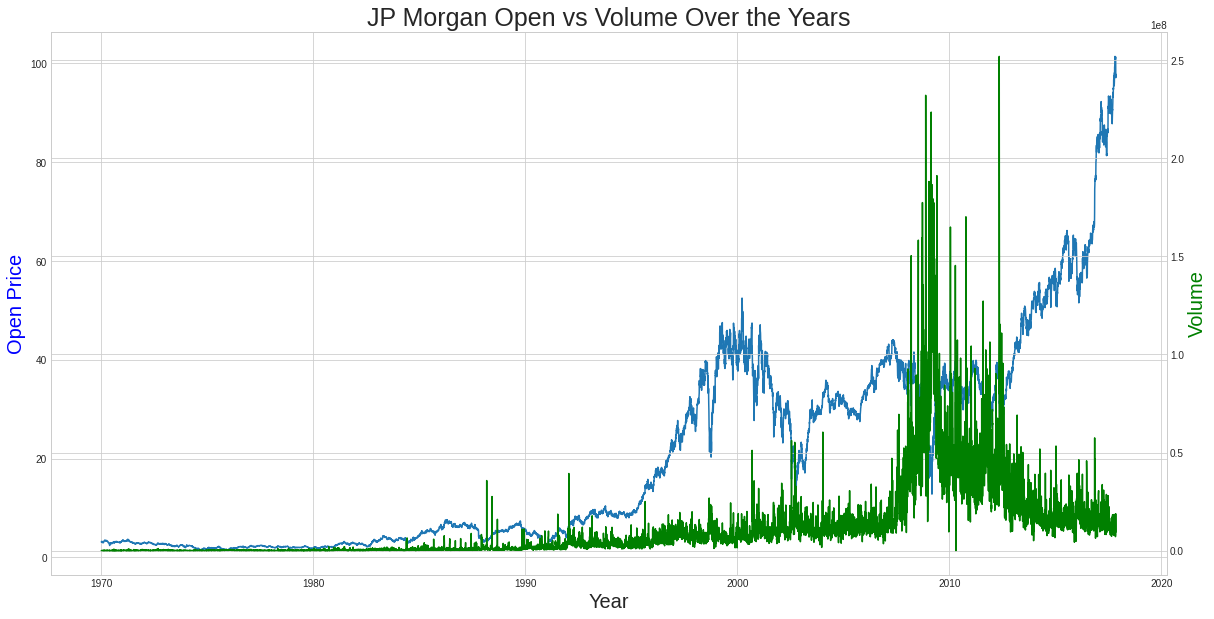

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
sns.lineplot(ax = ax, x='Date',y='Open',data=c2)
sns.lineplot(ax = ax2, x='Date',y='Volume',data=c2,color='green')
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Open Price',fontsize=20,color='blue')
ax2.set_ylabel('Volume',fontsize=20,color='green')
ax.set_title('JP Morgan Open vs Volume Over the Years',size=25)

### 1.3.6 Seasonality

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week
data['Dayofweek'] = data['Date'].dt.weekday

In [ ]:
selected_companies=data[data['Label'].isin(['jnj','jpm','gs','nke','pfe'])]

#### 1.3.6.1 Volume

In [ ]:
c3=selected_companies[selected_companies['Label'] == 'gs']

In [ ]:
c3['Volume'].describe()

count    4.661000e+03
mean     6.257749e+06
std      7.243749e+06
min      0.000000e+00
25%      2.807258e+06
50%      4.144442e+06
75%      6.714921e+06
max      1.253138e+08
Name: Volume, dtype: float64

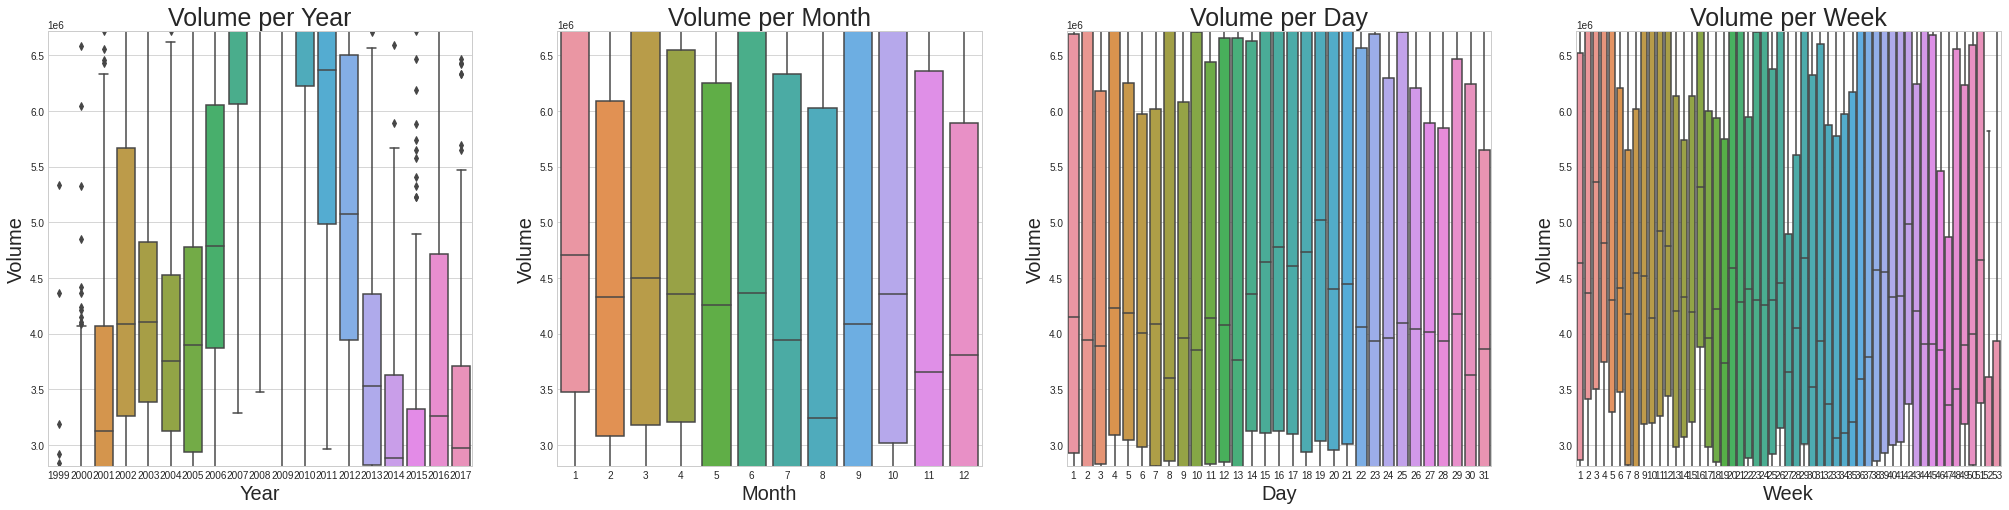

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(35,8))

def plot_vol(i,period):
  sns.boxplot(ax = ax[i],x = c3[period], y = c3['Volume'],data = c3)
  ax[i].set_xlabel(period,size=20)
  ax[i].set_ylabel('Volume',size=20)
  ax[i].set_ylim([2.807258e+06, 6.714921e+06])
  ax[i].set_title('Volume per '+period,size=25)

titles=['Year','Month','Day','Week']
i=0
while i<len(titles):
  plot_vol(i,titles[i])
  i+=1

#### 1.3.6.2 Close

In [ ]:
c4=selected_companies[selected_companies['Label'] == 'nke']

In [ ]:
c4['Close'].describe()

count    7620.000000
mean       13.507623
std        16.131066
min         0.179050
25%         2.098300
50%         6.489300
75%        16.178000
max        65.559000
Name: Close, dtype: float64

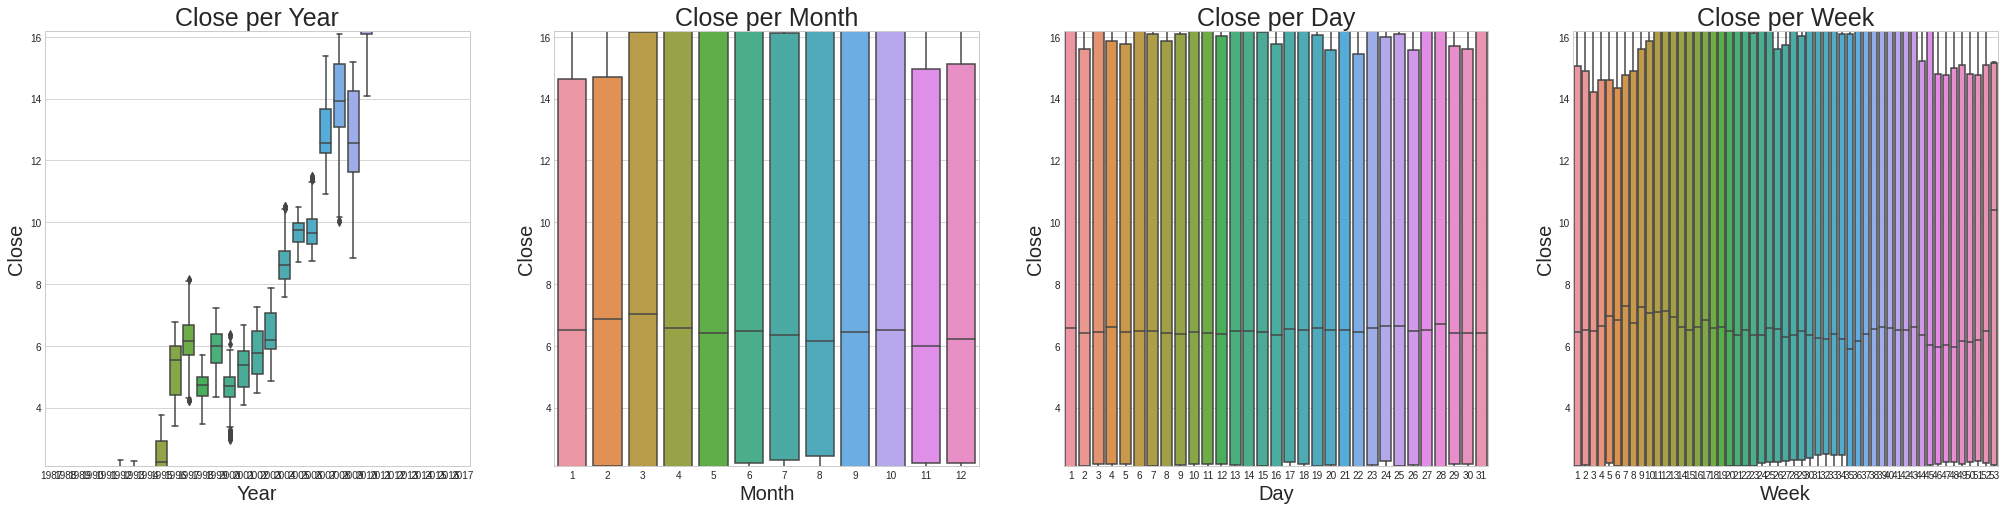

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(35,8))

def plot_close(i,period):
  sns.boxplot(ax = ax[i],x = c4[period], y = c4['Close'],data = c4)
  ax[i].set_xlabel(period,size=20)
  ax[i].set_ylabel('Close',size=20)
  ax[i].set_ylim([2.098300, 16.178000])
  ax[i].set_title('Close per '+period,size=25)

periods=['Year','Month','Day','Week']
i=0

while i<len(titles):
  plot_close(i,periods[i])
  i+=1

#### 1.3.6.3 Volume vs Open-Close

In [ ]:
c5=selected_companies[selected_companies['Label'] == 'pfe']

In [ ]:
df_year = c5.groupby(by="Year").mean()
df_month = c5.groupby(by="Month").mean()
df_week = c5.groupby(by="Week").mean()
df_day = c5.groupby(by="Day").mean()
df_dayofweek = c5.groupby(by="Dayofweek").mean()

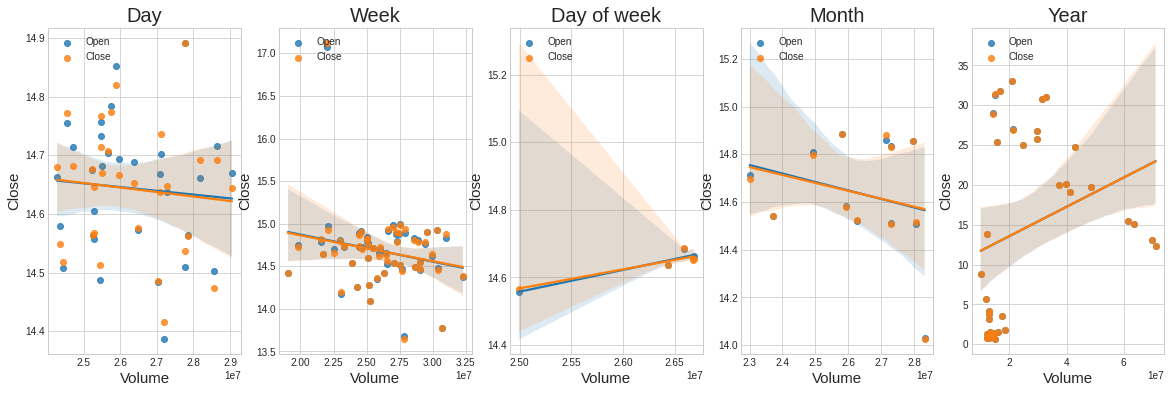

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(20,6))

def plot_vol_open_close(i,d,title):
  sns.regplot(ax = ax[i],x='Volume',y='Open', label='Open',data=d)
  sns.regplot(ax = ax[i],x='Volume',y='Close', label='Close',data=d)
  ax[i].set_xlabel('Volume',size=15)
  ax[i].set_ylabel('Close',size=15)
  ax[i].legend(loc='upper left')
  ax[i].set_title(title,size=20)

temp=[df_day,df_week,df_dayofweek,df_month,df_year]
titles=['Day','Week','Day of week','Month','Year']
i=0
while i<len(temp):
  plot_vol_open_close(i,temp[i],titles[i])
  i+=1

#### 1.3.6.4 Lags

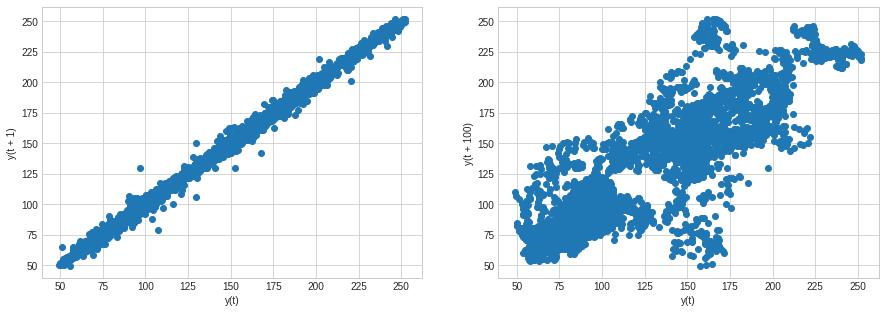

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
pd.plotting.lag_plot(c3['Open'],lag=1)
plt.subplot(1,2,2)
pd.plotting.lag_plot(c3['Open'],lag=100)

## 1.4 Data Munging

### 1.4.1 New Variables

- stock open minus close price (OC)
- stock high minus low price (HL)
- stock open minus high price (OH)
- stock high minus close price (HC)
- stock open minus low price (OL)
- stock low minus close price (LC)

In [ ]:
data['OC'] = data['Open']-data['Close']
data['HL'] = data['High']-data['Low']
data['OH'] = data['Open']-data['High']
data['HC'] = data['High']-data['Close']
data['OL'] = data['Open']-data['Low']
data['LC'] = data['Low']-data['Close']

**Moving Averages**

In [ ]:
def moving_average(df, window=5):
    return df['Close'].rolling(window).mean().shift()

In [ ]:
def get_indicator(ser):
    ser['SMA_7'] = moving_average(ser, 7)
    ser['SMA_14'] = moving_average(ser, 14)
    ser['SMA_21'] = moving_average(ser, 21)
    return ser

In [ ]:
data = get_indicator(data)
data.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Year,Month,Day,Week,Dayofweek,OC,HL,OH,HC,OL,LC,SMA_7,SMA_14,SMA_21
14887660,2017-11-01,26.7318,26.79,26.6700,26.77,1350,0,agm_b,2017,11,1,44,2,-0.0382,0.1200,-0.0582,0.02,0.0618,-0.1000,26.779500,26.761008,26.764473
14887661,2017-11-02,26.6700,26.67,26.5800,26.58,3411,0,agm_b,2017,11,2,44,3,0.0900,0.0900,0.0000,0.09,0.0900,0.0000,26.767128,26.764579,26.759725
14887662,2017-11-03,26.6900,26.69,26.5950,26.68,1677,0,agm_b,2017,11,3,44,4,0.0100,0.0950,0.0000,0.01,0.0950,-0.0850,26.747128,26.756008,26.743058
14887663,2017-11-06,26.7000,26.70,26.7000,26.70,239,0,agm_b,2017,11,6,45,0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,26.737128,26.754579,26.744011
14887664,2017-11-07,26.5401,26.75,26.5401,26.75,900,0,agm_b,2017,11,7,45,1,-0.2099,0.2099,-0.2099,0.00,0.0000,-0.2099,26.718557,26.753865,26.748768


In [ ]:
df_corr = data.corr()
# calculate correlation with target variable
correlation_with_target = df_corr.sort_values('Close')['Close']
print('\nMost Positive:\n')
display(correlation_with_target.tail(10))


Most Positive:



OL         0.714866
HL         0.890701
SMA_21     0.986339
SMA_14     0.991441
SMA_7      0.995757
Open       0.998930
High       0.999476
Low        0.999651
Close      1.000000
OpenInt         NaN
Name: Close, dtype: float64

### 1.4.2 Drop Irrelevant Data Entries

In [ ]:
data.drop(columns=['OpenInt'],inplace=True)

### 1.4.3 Training Data

In [ ]:
train=data[~data.Label.isin(['jnj','jpm','gs','nke','pfe'])]
train.shape

(14842194, 21)

In [ ]:
test=data[data.Label.isin(['jnj','jpm','gs','nke','pfe'])]
test.shape

(45471, 21)

### 1.4.4 Encoding

In [ ]:
encoder=LabelEncoder()
train.Label=encoder.fit_transform(train.Label)
test.Label=encoder.fit_transform(test.Label)

In [ ]:
train.Label.value_counts().count()

7158

In [ ]:
test.Label.value_counts().count()

5

### 1.4.5 Save Files

In [ ]:
test.to_csv('test.csv')
!cp test.csv "/content/drive/My Drive/Y4_T1/Machine Learning/Data/"

In [ ]:
train.to_csv('train.csv')
!cp train.csv "/content/drive/My Drive/Y4_T1/Machine Learning/Data/"